Optimization terminated successfully.
         Current function value: 37.830515
         Iterations: 114
         Function evaluations: 223
-10.802365786 0.0099967262206


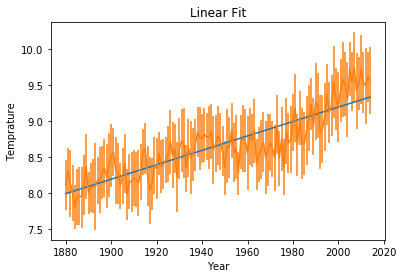

In [1]:
#Importing the data and Adding the column

import numpy as np
import pandas as pd
import xlwt
import matplotlib.pyplot as plt                                                 #importing libraries 

data = pd.read_excel('random.xlsx')                                             #importing data from excel file through pandas 
array= data.values                                                              #converting pandas into numphy

tempfix = lambda t : t + 8.68                                                   #creating a function of type f(x)=x+8.86
vtempfix= np.vectorize(tempfix)                                                 #vectorizing the function to operate on a column
newcolumn = vtempfix(array[:,5])                                                #operating the function on column 6
reshapenewcolumn = np.reshape(newcolumn, (newcolumn.size, 1))                   #reshaping the data
betterdata=np.append(array,reshapenewcolumn,axis=1)                             #combining the new column with old data   
np.set_printoptions(edgeitems=4,formatter={'float_kind':'{:0.3f}'.format})     # changing to decimal format and precession to 3 

#print(betterdat)  


#Functions 
def avg(y):                                   #Defining a function avg(y) that finds the avrage temprature of year 'y'
    
    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:                         #collecting temprature data of year 'y'
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j])          
    
    return float(str(round(np.sum(reqarray[:,6])/365, 3)))  #finding their mean    

def sd(y):                                   #Defining a function sd(y) that finds the standard deviation temprature of year 'y'

    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j]) 
    
    return float(str(round(365*np.std(reqarray[:,6])/364, 3)))  #finding the standard deviation       

#EROOR BAR PLOT

  
p=range(1880,2015)
x1=[]
y1=[]
sdv=[]
for l in p:        
        x1.append(l)
        y1.append(avg(l))                    #appending avrage values to variable y1
        sdv.append(sd(l))                    #appending avrage values to variable sdv
        

import scipy.optimize as opt

temp =y1 
y = np.arange(1880,2015)
err_temp = sdv

def chisq(para):    
    c=0
    a=para[0]
    b=para[1]
    i=range(0,135)
    for elem in i: 
        c= c + ((temp[elem] - a - b*y[elem])/err_temp[elem])**2
    return c

x0 = [1,1]

res = opt.minimize(chisq, x0,  method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
a,b=res.x
print(a,b)
plt.title('Linear Fit')
plt.xlabel('Year')
plt.ylabel('Temprature')
#plt.scatter(y,temp)
plt.plot(y,a+b*y)
plt.errorbar(y, temp,yerr=sdv) 
plt.show()


In [61]:
62172.7901639

62172.7901639

[[315861.771 315861.120 315860.470 315859.820 ..., 315214.544 315213.894
  315213.245 315212.595]
 [314599.533 314598.884 314598.236 314597.587 ..., 313953.602 313952.954
  313952.305 313951.657]
 [313339.823 313339.175 313338.528 313337.880 ..., 312695.187 312694.540
  312693.893 312693.246]
 [312082.640 312081.994 312081.347 312080.701 ..., 311439.299 311438.653
  311438.008 311437.362]
 ..., 
 [310881.347 310881.992 310882.637 310883.282 ..., 311524.112 311524.758
  311525.404 311526.049]
 [312136.111 312136.757 312137.403 312138.050 ..., 312780.171 312780.818
  312781.465 312782.112]
 [313393.401 313394.049 313394.697 313395.344 ..., 314038.757 314039.405
  314040.053 314040.702]
 [314653.219 314653.868 314654.517 314655.166 ..., 315299.870 315300.519
  315301.169 315301.819]]


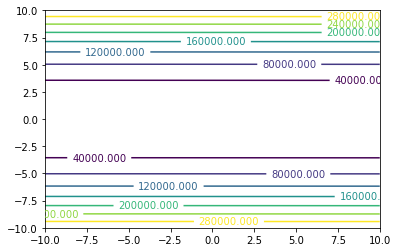

In [86]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def chi(a,b):    
    c=0
    i=range(0,135)
    for elem in i: 
        c= c + ((temp[elem] - a - b*y[elem])/err_temp[elem])**2
    return c

xlist = np.linspace(-10,10,1000)
ylist = np.linspace(-10,10,1000)

X,Y = np.meshgrid(xlist,ylist)
z=chi(X,Y)/1000000
print(z)

CS = plt.contour(X,Y,z)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

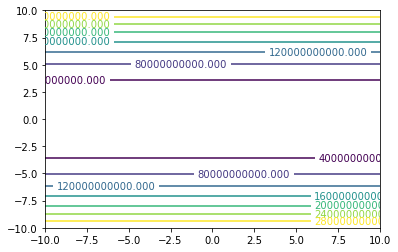

In [76]:
z1=chi(-10.8,Y)


C = plt.contour(X,Y,z1)
plt.clabel(C, inline=1, fontsize=10)
plt.show()

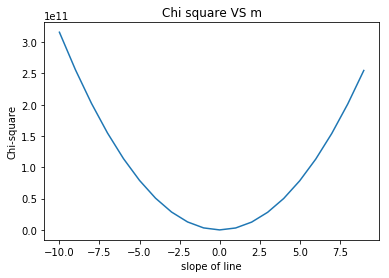

In [71]:
x2=range(-10,10)
plt.title('Chi square VS m')
plt.xlabel('slope of line')
plt.ylabel('Chi-square')
plt.plot(x2 ,chi(-10.802365786 ,x2))
plt.show()

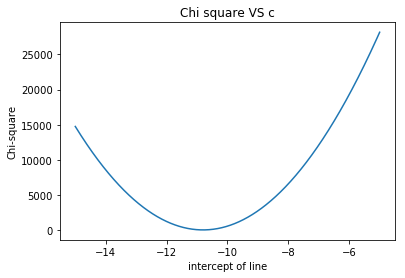

In [62]:
x3= np.linspace(-15,-5,1000)
plt.title('Chi square VS c')
plt.xlabel('intercept of line')
plt.ylabel('Chi-square')
y3=chi(x3,0.0099967262206)
plt.plot(x3,y3)
plt.show()